# TODO

* Merge Patryk's Notebook
* Add files mentioned in email
* Rearrange imports to top of file
* Clean up code 
  * Remove unused imports
  * Remove commented code
  * Add comments and documentation to code
  * Use pep8
  * Make sure all code is in functions
  * Make code more concise
* Remove old documentation
* Complete documentation
* Proofread
* Develop and document objective 4

## COMP5721M: Programming for Data Science 

## Coursework 3: Data Analysis Project

Last modified: 30 November 2023


# MET Office Data Analysis


* Omar Choudhry, sc20osc@leeds.ac.uk / scsoc@leeds.ac.uk
* David Marples, edu9d2m@leeds.ac.uk
* Riham Hlis, scrhl@leeds.ac.uk
* Patryk Wasniewski, bs19pw@leeds.ac.uk

# Project Requirements
_PLEASE DELETE THIS WHOLE CELL BEFORE SUBMITTING YOUR PROJECT_

The purpose of this assignment is to develop your skills
in organising and presenting a Data Science project.

Since most of the marks will be awarded for organisation
and presentation, it is suggested that you do not initially attempt
anything too complicated. However, once you have managed
to get a basic pipeline working that fits the guidelines, 
you are encouraged to extend and elaborate your analysis.

Your project should entirely be contained within this template file.
You should keep the basic structure indicated below. To facilitate
grading according to the marking scheme.

You _may_ import any module that is provided with Anaconda3 Python.


### Marking Scheme

The marking scheme  is as follows:

* Project Plan:
    * Description of data to be used (10)
    * Overview of Project Aims  (5)
    * Design  (5)
    
* Program Code: (15)<br>
    Code should be laid out in steps with explanations
    and intermediate output with comments. 
    You should ensure that the steps do not require
    a large amount of processing time.

* Project Outcome:
    * Explanation of Results (10)<br>
        This should include a qualitative description
        of the results as well as key figures and tables
        of results.
    * Results visualisation (10)<br>
        This should be graphical representations of the
        results with brief explanations (ordinary tables will be
        graded as part of the explanation of results)
    * Conclusion (5)

### Data Resources

You can use any data you like. Many useful resources are available.

The Data Resources section of the module (Unit 4.3 on Minerva) has links to several example data sets.

As a starting point you could browse the following:
* [Kaggle](https://www.kaggle.com/)
* [Our World in Data](https://ourworldindata.org/)
* [scikit-learn datasets](https://scikit-learn.org/stable/datasets.html)
* [scikit-learn tutorial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)

### Using this Notebook Template
Please use this notebook as a template for your project file.
In the following cells of the notebook, _italic text_ giving explanations
and examples should be either deleted, or, in most cases, replaced by appropriate text describing your project. 
Text that is not in italic (which is mostly headings) should
be left as it is. __Your project report notebook should the same overall
structure as this template notebook.__
An exception to this is the current markup cell describing the project
requiements. You should delete this before submitting your notebook.

# Project Plan

## The Data (10 marks)

_Here you should describe the data indluding details of:
where it comes from, what data it contains, is it accurate. (Potentially you could create data from a simulation but you should still explain why and how you intend to generate this data.)_

_It can be just one dataset or several that can be combined
somehow._

_There are 10 marks for this, so a fairly detailed description
of the data is expected (around 300-400 words)_

https://www.metoffice.gov.uk/research/climate/maps-and-data/uk-and-regional-series

There are freely available datasets (as text files) from the met office at the level of the whole UK, monthly. These cover mean temperature, rainfall, number of rainfall days, and number of sunshine days. Our current version already has these.

Additional data is available with daily resolution, on a grid over the UK that would allow finer resolution (for example, “Yorkshire rainfall over a rolling week”), but (a) you need to be registered (which I (David) am), (b) this data is in .nc format, (c) there are separate files for each year, and (d) it potentially is a HUGE dataset.

- Intro about climate change and the meteorological factors including Ozone.
- We need to describe how we split the dataset and combine the ozone dataset.

## Project Aim and Objectives (5 marks)

_Here you should describe the general aim of your project in
around 200-300 words._

_This can can be anything from classifying items according to
their characteristic features (which mushrooms are poisonous?) 
to simulating an evolving process (will the rabbits eat all
the carrots or get eaten by the foxes?)_

_Here some ideas of general types of processing functionality
that you could implement:_

* _Classification: separate data items into classes according
  to their charactersitics (can be either a definite or a
  statistical kind of classification)_
* _Corellation: find correspondences between different attributes within
  a dataset_
* _Search: find solutions matching some criteria_
* _Visualisation: find informative ways to
  display the structure of a large and/or complex dataset_
* _Query Answering: create a system that enables one to retrieve information by evaluating some form of query representation_
* _Simulation: model the evolution of a complex process_

__Objective__: To use MetOffice data to investigate what evidence there is that average temperatures are rising in the UK, and whether this is associated with changes in rainfall/temperature and maybe sunshine patterns.
__Hypothesis__: UK temperatures have been rising on average. Since this implies higher energy in the atmosphere, this is associated with more extreme weather events (more heatwaves and intense periods of rainfall, and possibly more rainfall overall).

To use MetOffice data to investigate what evidence there is that average temperatures are rising in the UK, and whether this is associated with changes in rainfall/temperature and maybe sunshine patterns. 
Corellation maybe by means of visualisation : find correspondences between different attributes within a dataset 
1 testing the changes in meteorological factors over decades  
a mean temperature  
b rainfull  
c sunshine  
2 test whether high/low temperatures correlate with more intense rainfall/sunshine 
3  test whether the above meteorological factors correlate with Ground-Level Ozone Concentration 

### Background
It has been postulated that global atmospheric CO<sub>2</sub> levels have been rising due to anthropogenic fossil fuel use, and that this is leading to climate change because of the "greenhouse" effects of CO<sub>2</sub>. Specifically, this should lead to a global rise in average temperature, due to trapping of heat from insolation. 

It has been argued that this increase in temperature will be associated with more extreme weather events, which could include storms and heatwaves. 

An increase in heatwaves could be predicted to lead to an increase in deaths due to heat stress: patients cardiovascular and respiratory diseases are thought to be particularly susceptible to such effects.

__Aim__: In this project we will use a range of data sources to investigate whether there is evidence that these changes are happening in the UK, and in Yorkshire specifically.

__Objective__: To use MetOffice data to investigate what evidence there is that average temperatures are rising in the UK, and whether this is associated with changes in rainfall/temperature and maybe sunshine patterns.

__Hypotheses__: (1) UK temperatures have been rising on average. 
(2) Since this implies higher energy in the atmosphere, this is associated with more extreme weather events (more heatwaves and intense periods of rainfall, and possibly more rainfall overall). 
(3) Furthermore, it is hypothesised that an increase in respiratory disease will be detectable.

### Specific Objective(s)

_You should chose and list __up to 4__ specific objectives suited to the data you will be working with and the type of project you wish to carry out. 
There should be <b>at least one
per person doing the project</b>. There is no need
for  the objectives them to be completely different. 
They could be different
stages of the processing requirements, or different processing
functions that the system  provides. Or just
different aspects of data analysis that will be conducted.
Typically, it is expected that there would be one objective
per person. Replace the following examples with your own objectives:_

* __Objective 1:__ <u>Test whether UK mean temperature and rainfall have been higher in recent years</u> than in the late years of the 19th century. Temperature data will be obtained, converted into a PANDAS data frame, cleaned, and graphs plotted for different months, seasons, and the whole year. Mean temperatures (and standard deviations), and linear correlations will be obtained for different time periods, to assess whether (a) the mean temperature has risen over the last ~100 years (e.g. by t test), and whether the rate of change is significantly different. Data will be presented as summary statistics, and graphs, perhaps using rolling averaged data to smooth out severe annual fluctuations. 
* __Objective 2:__ <u>Test whether Yorkshire rainfall patterns have changed</u> over the last ~100 years. Daily/local rainfall data will be obtained, and analysed to determine whether the intensity of rainfall has increased (i.e. peak rainfall over one, or a few consecutive, day(s)).
* __Objective 3:__ <u>Test whether Yorkshire temperature patterns have changed</u> over the last ~60 years. Using a dataset covering daily maximum temperatures, heatwave duration and intensity will be investigated.
* __Objective 4:__ <u>Test whether respiratory disease rates have changed</u>. This will probably require more detailed data than the basic monthly set. Correlations between different data sets will be used to investigate if there are consistent relationships between them, and whether the balance is changing with time.

#### Assessing the Impact of Meteorological Factors on Ground-Level Ozone Concentration 

The main aim is to evaluate the associations between ground-level ozone concentration and key meteorological factors, including annual temperature, airfrost, sunshine, and rainfall, to understand their impact on ozone formation and levels. NOTE once confirmed by other group members who are working on the main dataset.  

Since the meteorological data was based on the UK, the data about the Ozone concentration was derived from the gov.uk website [Annual mean concentrations of O3 in the UK, 1987 to 2022](https://assets.publishing.service.gov.uk/media/6446414522ef3b000c66f764/Table13.csv) as a CSV file. 

- Reading the CSV file as a data frame in Pandas  
- Merging the two datasets  
- Assessing the changes in the background concentration in rural and urban areas 
- Assessing the correlation between rural and urban background concentration of Ozone and meteorological factors.  
- NOTE: this is done for the mean temperature data and could be extended to other data (rainfall, airfrost, sunshine) 

## System Design (5 marks)

_Describe your code in terms of the
following two sections._

### Architecture

_Typically this would be  a pipeline in which data goes through several
stages of transformation and analysis, but other architectures are possible.
This does not need to be particularly complicated. A simple diagram with
100-150 words of explanation would
be a good way to present your architecture._
  
### Processing Modules and Algorithms

_Briefly list and describe the most significant computational components of your system and the algorithms you will use to implement them. 
This could include things like:_

* _cleaning the data by removing outliers_
* _combining different datasets_
* _converting samples to a special representaion (such as feature vectors)_
* _constructing a special data-structure (such as a decision tree)_
* _running some kind of analysis_

_Your list can be presented in similar form to the one just given, 
but should include a brief
but more specific description of the components and/or algorithms.
Probably three or four components is sufficient for most projects, but
you may want to have more._

# Program Code (15 marks)

_Your code should be divided into relatively short cells, with brief
explanation in markup cells between._

_As noted in the assigment overview, it is not necessary that your coding be
super complex in order to get a good mark. Although there is a mark for
the coding achievement, it is only a quarter of the total._

_The suggested length of the code is about 150 lines for 1 person or 500
for a 4 peope project. You should not use more than 500 lines of code._

_You should divide the code in accordance with the specification of modules and/or
algorithms you gave in the previous section. Complex modules should be further
divided into several code cells._

Please note the following about your code:
* <b><i>You may import any packages/modules you wish to use for your project.</i></b>


* <b><i>You should submit your notebook in a state where all cells have been
    executed and are displaying the output that you wish to present for grading.</i></b>
    (We will not normally run your code, unless for some reason we wish to check
    that the code functionality matches the given description.)
    
    
* Although you may be programming in a "pipeline" style, it is strongly suggested you use function definitions to organise your code. As well as being generally good programming practice, it will be helpful for easy and flexibily presentation of results visualisations later in the document. In the visualisation sections you will be able to produce images in a concise and flexible way by calling functions defined in the program code secion.

#### _Brief Explanation of following code cell_

_Below is a silly example of some trivial data. Replace this markup cell and the one below with something more interesting. And go on adding more until you have 
achieved your objectives (at least to some extent)._

In [1]:
## Code Cell
## This will typically consist of:

## (a) Code doing some data manipulation:

fm_data = { "souvenir"     :  9,
            "cute animal"  :  5,
            "meme"         : 36,
            "smiley"       :  3,
            "random image" : 13
          }
total = sum([fm_data[f] for f in fm_data])

## (b) Code for displaying some output:

print("The total number of fridge magnets is:", total)

The total number of fridge magnets is: 66


#### _Comment on previous cell output (optional)_

_As well as describing code, it will in many cases be informative to describe the output
that has been generated by a cell._

_The previous output cell shows a key number in our fridge magnet analysis._

#### _Brief Explanation of following code cell_

_Since fridge magnets often take the form of cute animals, we use `pandas` to convert the raw data into a `DataFrame`._

In [2]:
## Code Cell
import pandas
df = pandas.DataFrame.from_dict(fm_data, orient='index')
df

,0
souvenir,9
cute animal,5
meme,36
smiley,3
random image,13


#### _Comment on previous cell output (optional)_
_The output from the previous cell is very interesting._

_The following cell defines a visualisation function for the data._

In [3]:
def fridge_sorted_bar(color='blue'):
    df.sort_values(0).plot.bar( color=color)   

###  _More code cells_
_You can add as many code cells as you require, but it is
recommended that you break code into relatively small chunks and
do not exceed the maximum number of lines stated above._

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def convert_to_dataframe(url):
    # Read the txt file
    data = pd.read_csv(url, delim_whitespace=True, skiprows=5, na_values='---')
    # Set the first column as the index
    data.set_index(data.columns[0], inplace=True)
    return data

In [6]:
# URL of the rainfall txt file
rainfall_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Rainfall/date/UK.txt'

# Convert the txt file to a DataFrame
rainfall_df = convert_to_dataframe(rainfall_url)

# Display the first 5 rows of the DataFrame
rainfall_df.head()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
year,,,,,,,,,,,,,,,,,
1836,101.5,69.8,122.2,75.1,13.8,76.5,109.2,63.1,113.2,120.8,150.0,108.6,NaN,211.1,248.8,384.1,1123.8
1837,79.5,104.7,36.2,54.1,39.9,57.9,87.5,90.7,67.5,97.0,97.8,96.0,292.8,130.2,236.1,262.3,908.9
1838,35.4,55.5,69.4,57.1,61.8,117.8,84.2,92.8,74.9,93.7,120.5,74.3,186.9,188.3,294.9,289.1,937.4
1839,75.7,67.2,83.1,38.4,35.5,93.7,118.5,84.3,145.1,102.1,116.0,103.9,217.2,157.0,296.5,363.3,1063.6
1840,124.6,67.9,14.2,23.2,83.6,68.6,90.3,78.0,106.1,65.9,126.3,41.0,296.5,121.0,237.0,298.3,889.8


In [7]:
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 1836 to 2023
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   jan     188 non-null    float64
 1   feb     188 non-null    float64
 2   mar     188 non-null    float64
 3   apr     188 non-null    float64
 4   may     188 non-null    float64
 5   jun     188 non-null    float64
 6   jul     188 non-null    float64
 7   aug     188 non-null    float64
 8   sep     188 non-null    float64
 9   oct     188 non-null    float64
 10  nov     188 non-null    float64
 11  dec     188 non-null    float64
 12  win     187 non-null    float64
 13  spr     187 non-null    float64
 14  sum     187 non-null    float64
 15  aut     187 non-null    float64
 16  ann     187 non-null    float64
dtypes: float64(17)
memory usage: 26.4 KB


<AxesSubplot:xlabel='year'>

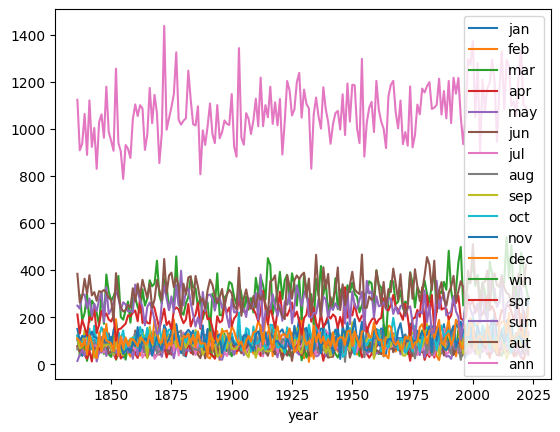

In [8]:
rainfall_df.plot()

<AxesSubplot:xlabel='year'>

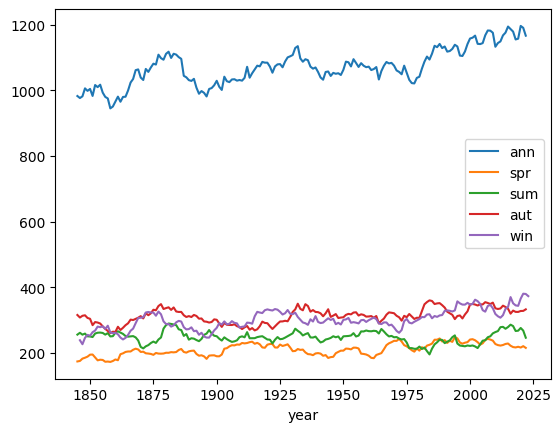

In [9]:
rainfall_df[["ann","spr","sum","aut","win"]].rolling(10).mean().plot()

<AxesSubplot:xlabel='year'>

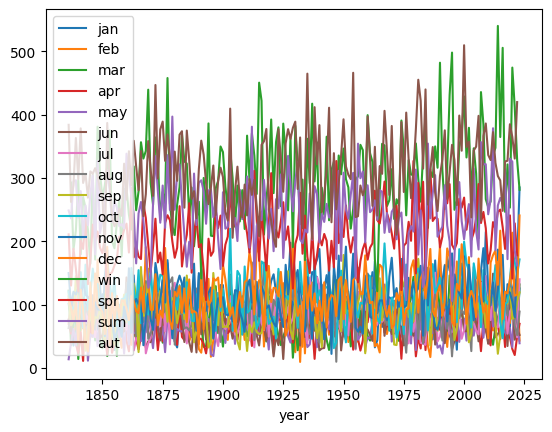

In [10]:
# Plot wihtout column 'ann'
rainfall_df.drop('ann', axis=1).plot()

In [11]:
raindays_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Raindays1mm/date/UK.txt'

raindays_df = convert_to_dataframe(raindays_url)

raindays_df.head()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
year,,,,,,,,,,,,,,,,,
1891,13.6,3.5,13.2,8.8,15.3,8.9,15.3,21.5,15.5,18.7,15.3,18.7,NaN,37.2,45.8,49.6,168.4
1892,15.3,13.7,7.4,8.8,13.7,13.7,9.9,15.8,15.0,19.2,13.9,12.0,47.7,29.9,39.4,48.1,158.3
1893,14.5,18.2,7.1,5.0,9.7,8.4,15.3,14.3,14.1,16.9,13.7,17.3,44.6,21.8,38.0,44.7,154.4
1894,19.7,16.7,10.4,12.6,15.9,12.9,16.4,16.8,6.6,15.2,14.9,15.7,53.7,39.0,46.1,36.7,173.8
1895,17.4,4.3,16.5,11.5,5.5,9.1,16.2,18.0,7.0,16.8,17.5,16.4,37.4,33.5,43.3,41.3,156.2


<AxesSubplot:xlabel='year'>

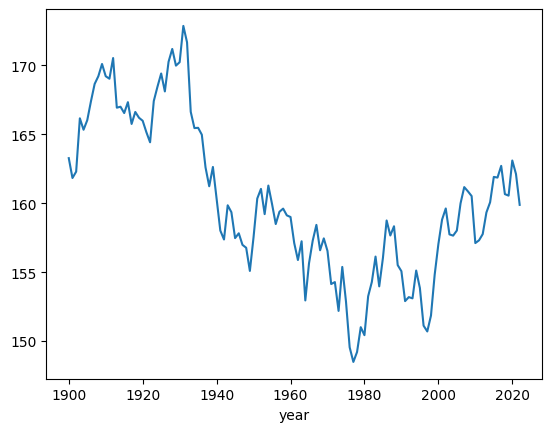

In [12]:
raindays_df["ann"].rolling(10).mean().plot()

In [13]:
airfrost_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/AirFrost/date/UK.txt'

airfrost_df = convert_to_dataframe(airfrost_url)

airfrost_df.head()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
year,,,,,,,,,,,,,,,,,
1960,15.8,16.6,5.4,2.7,0.6,0.0,0.0,0.0,0.3,0.7,5.2,14.4,NaN,8.7,0.0,6.2,61.7
1961,14.5,3.8,4.2,2.5,1.2,0.1,0.0,0.0,0.0,0.7,7.6,19.7,32.7,7.9,0.2,8.3,54.3
1962,10.5,11.4,20.9,5.6,1.1,0.5,0.0,0.0,0.1,1.6,9.4,18.0,41.6,27.5,0.6,11.1,79.1
1963,27.4,26.1,8.7,3.3,0.8,0.0,0.0,0.0,0.1,0.3,5.1,15.0,71.6,12.8,0.0,5.5,86.9
1964,11.6,10.8,11.1,3.0,0.0,0.3,0.0,0.1,0.3,2.7,5.7,16.7,37.5,14.1,0.4,8.7,62.3


In [14]:
sunshine_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Sunshine/date/UK.txt'

sunshine_df = convert_to_dataframe(sunshine_url)

sunshine_df.head()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
year,,,,,,,,,,,,,,,,,
1910,50.9,72.2,130.3,122.8,190.5,177.5,148.6,128.8,120.5,74.5,67.0,29.9,NaN,443.7,454.9,262.0,1313.5
1911,46.1,60.4,102.0,126.2,208.1,205.1,250.4,201.1,163.2,86.2,56.6,36.7,136.4,436.3,656.5,306.0,1542.1
1912,33.5,53.5,89.7,195.6,153.8,129.7,133.3,80.5,110.8,91.6,33.5,19.4,123.8,439.1,343.5,235.9,1124.8
1913,29.3,52.0,100.9,115.5,161.2,170.9,133.0,144.1,105.2,88.1,58.4,32.0,100.7,377.6,447.9,251.6,1190.5
1914,28.6,59.1,93.7,202.3,157.4,207.3,145.5,172.8,158.7,73.0,51.0,36.6,119.7,453.4,525.6,282.7,1386.0


In [15]:
min_temperature_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmin/date/UK.txt'

min_temperature_df = convert_to_dataframe(min_temperature_url)

min_temperature_df.head()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
year,,,,,,,,,,,,,,,,,
1884,2.7,1.4,1.8,2.2,5.0,7.9,10.3,10.5,9.0,4.9,1.8,0.9,NaN,3.01,9.59,5.24,4.88
1885,-0.3,1.3,-0.1,2.5,3.5,7.8,9.5,8.1,6.8,3.1,2.3,0.3,0.61,1.97,8.48,4.03,3.74
1886,-1.5,-1.8,-0.1,2.2,4.7,7.5,9.8,10.0,8.1,6.9,3.0,-1.7,-0.96,2.24,9.10,5.99,3.94
1887,-0.7,0.2,-0.1,0.9,4.6,8.8,10.6,9.0,6.8,2.9,1.2,-0.7,-0.75,1.80,9.46,3.64,3.65
1888,0.2,-1.4,-0.9,1.7,4.6,7.3,8.7,8.8,7.0,3.8,4.2,1.6,-0.64,1.78,8.29,4.97,3.80


In [16]:
max_temperature_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmax/date/UK.txt'

max_temperature_df = convert_to_dataframe(max_temperature_url)

max_temperature_df.head()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
year,,,,,,,,,,,,,,,,,
1884,7.3,6.8,8.5,10.1,14.5,17.1,18.8,20.2,17.0,11.8,7.5,5.8,NaN,11.02,18.73,12.10,12.14
1885,4.3,7.3,7.2,10.8,11.8,17.0,19.4,16.8,15.0,9.3,7.5,5.9,5.75,9.91,17.76,10.58,11.04
1886,3.7,3.4,6.1,10.5,13.1,16.4,18.7,18.5,16.0,12.9,8.6,4.1,4.36,9.88,17.87,12.51,11.04
1887,4.8,6.9,6.7,9.9,13.0,19.8,20.7,19.1,14.5,10.0,6.6,4.9,5.23,9.88,19.87,10.37,11.44
1888,5.5,3.7,5.2,9.0,14.1,16.3,16.0,16.9,15.4,11.4,8.9,7.1,4.74,9.41,16.38,11.91,10.81


In [17]:
mean_temperature_url = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/Tmean/date/UK.txt'

mean_temperature_df = convert_to_dataframe(mean_temperature_url)

mean_temperature_df.head()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
year,,,,,,,,,,,,,,,,,
1884,5.0,4.2,5.1,6.2,9.7,12.5,14.5,15.3,13.0,8.3,4.6,3.3,NaN,6.98,14.11,8.62,8.48
1885,2.0,4.2,3.5,6.6,7.6,12.3,14.5,12.4,10.9,6.2,4.8,3.0,3.14,5.92,13.09,7.28,7.36
1886,1.1,0.8,2.9,6.3,8.8,11.9,14.2,14.1,12.0,9.9,5.7,1.2,1.68,6.01,13.42,9.20,7.45
1887,2.1,3.5,3.3,5.4,8.7,14.3,15.6,14.0,10.6,6.4,3.9,2.1,2.23,5.80,14.61,6.97,7.51
1888,2.8,1.1,2.1,5.3,9.2,11.8,12.3,12.8,11.2,7.6,6.5,4.3,2.03,5.56,12.31,8.43,7.28


In [18]:
mean_temperature_pd = pd.read_table(mean_temperature_url, skiprows = 5, sep = '\s+')

print(type(mean_temperature_pd))

mean_temperature_pd

<class 'pandas.core.frame.DataFrame'>


,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1884,5.0,4.2,5.1,6.2,9.7,12.5,14.5,15.3,13.0,8.3,4.60,3.30,---,6.98,14.11,8.62,8.48
1,1885,2.0,4.2,3.5,6.6,7.6,12.3,14.5,12.4,10.9,6.2,4.80,3.00,3.14,5.92,13.09,7.28,7.36
2,1886,1.1,0.8,2.9,6.3,8.8,11.9,14.2,14.1,12.0,9.9,5.70,1.20,1.68,6.01,13.42,9.20,7.45
3,1887,2.1,3.5,3.3,5.4,8.7,14.3,15.6,14.0,10.6,6.4,3.90,2.10,2.23,5.80,14.61,6.97,7.51
4,1888,2.8,1.1,2.1,5.3,9.2,11.8,12.3,12.8,11.2,7.6,6.50,4.30,2.03,5.56,12.31,8.43,7.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2019,3.4,6.0,6.8,8.4,10.0,13.2,16.4,15.8,13.1,8.9,5.30,5.10,5.05,8.38,15.14,9.10,9.39
136,2020,5.6,5.1,5.6,9.1,11.3,14.0,14.3,15.9,12.8,9.4,7.70,4.30,5.28,8.68,14.76,9.98,9.62
137,2021,2.2,4.1,6.4,5.7,9.1,14.2,16.6,15.0,14.7,10.9,7.00,5.30,3.51,7.07,15.28,10.84,9.28
138,2022,4.7,5.6,6.7,8.1,11.8,13.9,16.5,16.6,13.4,11.6,8.20,2.90,5.18,8.87,15.71,11.05,10.03


In [19]:
# Flatten each dataset so that instead of a table of months against year, it is a single row of data for each month/year
rainfall_stack = rainfall_df.stack()
raindays_stack = raindays_df.stack()
airfrost_stack = airfrost_df.stack()
sunshine_stack = sunshine_df.stack()
min_temperature_stack = min_temperature_df.stack()
max_temperature_stack = max_temperature_df.stack()
mean_temperature_stack = mean_temperature_df.stack()

# Create a new DataFrame with the flattened data
weather_df = pd.DataFrame({'rainfall': rainfall_stack,
                           'raindays': raindays_stack,
                           'airfrost': airfrost_stack,
                           'sunshine': sunshine_stack,
                           'min_temperature': min_temperature_stack,
                           'max_temperature': max_temperature_stack,
                           'mean_temperature': mean_temperature_stack})

# Display the first 5 rows of the DataFrame
weather_df

rainfall  raindays  airfrost  sunshine  min_temperature  \
year                                                                
1836 ann    1123.8       NaN       NaN       NaN              NaN   
     apr      75.1       NaN       NaN       NaN              NaN   
     aug      63.1       NaN       NaN       NaN              NaN   
     aut     384.1       NaN       NaN       NaN              NaN   
     dec     108.6       NaN       NaN       NaN              NaN   
...            ...       ...       ...       ...              ...   
2023 may      39.1       7.3       0.1     207.2             7.00   
     nov     285.2      38.6      32.5     182.7             1.30   
     oct     171.5      16.9       1.1      84.8             7.60   
     sep     119.4      13.5       0.0     142.4            11.00   
     win     281.5      40.6       0.0     535.9            11.04   

          max_temperature  mean_temperature  
year                                         
1836 ann              NaN               NaN  
     apr              NaN               NaN  
     aug              NaN               NaN  
     aut              NaN               NaN  
     dec              NaN               NaN  
...                   ...               ...  
2023 may            16.20             11.60  
     nov             7.34              4.31  
     oct            14.00             10.80  
     sep            19.40             15.20  
     win            19.74             15.35  

[3191 rows x 7 columns]

### Objective 1: Assessing the Impact of Meteorological Factors on Ground-Level Ozone Concentration

The main aim is to evaluate the associations between ground-level ozone concentration and key **meteorological** factors, including annual temperature, airfrost, sunshine, and rainfall, to understand their impact on ozone formation and levels. 

Since the meteorogical data was based on the UK, the data about the Ozone concentration was derived from the gov.uk website [Annual mean concentrations of O3 in the UK, 1987 to 2022](https://assets.publishing.service.gov.uk/media/6446414522ef3b000c66f764/Table13.csv) as a CSV file and it was read as a pandas dataframe using read.csv method. The dataset was investigated using the info and display method.

To achieve the objective of checking whether the mean concentration of O3 might be correlated to the mean temperature in the UK, the dataset of teh annual mean concentration of Ozone is read using the read_csv methods from Pandas library. 

#### STEP 1: reading the dataframe from the csv file

In [20]:
# annual_mean_concentration_o3
url = 'https://assets.publishing.service.gov.uk/media/6446414522ef3b000c66f764/Table13.csv'
df_o3 = pd.read_csv('https://assets.publishing.service.gov.uk/media/6446414522ef3b000c66f764/Table13.csv')
print(df_o3.shape)
print(list(df_o3.columns))

(36, 7)
['year', 'Rural_Background', 'Urban_Background', 'RB_CI', 'UB_CI', 'RB_n', 'UB_n']


In [21]:
df_o3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              36 non-null     int64  
 1   Rural_Background  36 non-null     float64
 2   Urban_Background  31 non-null     float64
 3   RB_CI             36 non-null     float64
 4   UB_CI             31 non-null     float64
 5   RB_n              36 non-null     int64  
 6   UB_n              31 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 2.1 KB


In [22]:
display(df_o3)

,year,Rural_Background,Urban_Background,RB_CI,UB_CI,RB_n,UB_n
0,1987,55.733720,NaN,6.721002,NaN,5,NaN
1,1988,65.649813,NaN,4.659027,NaN,12,NaN
2,1989,67.864646,NaN,4.972931,NaN,14,NaN
3,1990,69.718848,NaN,4.508191,NaN,15,NaN
4,1991,66.794271,NaN,4.455004,NaN,12,NaN
5,1992,67.864186,39.920732,5.035280,12.525720,14,4.0
6,1993,65.215029,40.177077,5.309472,4.829715,14,8.0
7,1994,69.383870,47.429640,3.869374,3.260084,14,13.0
8,1995,70.041854,50.599691,3.851554,4.459545,15,12.0
9,1996,66.705514,45.922460,3.360383,2.793073,15,18.0


**The output from the above cell shows the dataframe, detailing the annual background concentration of ozone in the UK, both rural and urban area, from 1987 to 2006.**

It includes years, average annual ozone concentrations in rural (Rural_Background) and urban (Urban_Background) areas in micrograms per cubic meter, with missing values in some years. The columns RB_CI and UB_CI represent confidence intervals for rural and urban ozone concentrations, indicating uncertainty or variability in these measurements. The RB_n and UB_n columns denote the number of monitoring sites for rural and urban data, respectively. 

The shape method concluded that the dataset has 7 columns and 36 rows. The columns method showed the title of the columns as follows: 'year', 'Rural_Background', 'Urban_Background', 'RB_CI', 'UB_CI', 'RB_n', 'UB_n'. The dataset the year the measurement was taken on ranging from 1987 to 2006, the measurement of the background concentration of Ozone in rural and urban areas in the UK, the confidence interval for the measurements and the number of monitoring sites where the background Ozone conecentrations were measured in order to calculate the mean concentration for both the rural and urban areas. 

The info method brought us insights about the missing data in the urban background column. Since the number of rows is small the dataset was investigated using the display method. it was noted that the data range between x year to year.

Overall, the data suggests an increasing trend in ozone concentration over these years in both settings, with some fluctuations and varying data completeness.

#### STEP 2: Merging the two datasets on the column 'year'

In order to make the assessment between the two datasets: one containing Ozone data (df_o3) and another has the mean temperature data (mean_temperature_df). The two datasets were merged using the merge method from Pandas library. Since the the MetOffice dataset covers the period between 1884 and 2023 and the GOV.UK dataset covers a shorter period, the merge was essential to ensure that the data are matched. 

The merge was performed by combining the relevant columns from the two datasets i.e year, rural background and urban background from the GOV.UK dataset and year, ann from the MetOffice dataset. It was done on the year column with an inner join to ensure that only data with matching year values are avaialble in the merged dataframe. 

The missing data in the 'Urban_Background' column  were filtered using the notna method to ensure that we work with complete data. 

In [23]:
# merge df_o3 and mean_temperature_df
df_merged = pd.merge(df_o3[['year', 'Rural_Background', 'Urban_Background']], 
                     mean_temperature_pd[['year', 'ann']], 
                     how='inner', left_on='year', right_on='year'
                     )
print(df_merged.shape)
print(list(df_merged.columns))

(36, 4)
['year', 'Rural_Background', 'Urban_Background', 'ann']


In [24]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              36 non-null     int64  
 1   Rural_Background  36 non-null     float64
 2   Urban_Background  31 non-null     float64
 3   ann               36 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.4 KB


In [25]:
# filter out nan values
df_merged_filtered = df_merged[df_merged['Urban_Background'].notna()].reset_index()
display(df_merged_filtered)

,index,year,Rural_Background,Urban_Background,ann
0,5,1992,67.864186,39.920732,8.69
1,6,1993,65.215029,40.177077,8.33
2,7,1994,69.383870,47.429640,8.89
3,8,1995,70.041854,50.599691,9.17
4,9,1996,66.705514,45.922460,8.18
5,10,1997,65.878042,45.256292,9.41
6,11,1998,68.051005,48.456825,9.16
7,12,1999,72.206833,55.613054,9.37
8,13,2000,67.168577,52.186089,9.10
9,14,2001,66.141094,51.536867,8.80


The output above depicts a dataframe of 4 columns, namely 'year', 'Rural_Background', 'Urban_Background', 'ann' and 31 rows which implies 31 years of matched data. 

#### STEP 3: assessing the changes in the background concentration in rural and urban areas 

To understand the trend of the average annual concentration of Ozone in rural and urban areas, the data were plotted to calculate and visualise the trend of Ozone concentrations in both rural and urban areas. 

The correlation between the rural and urban background concentration of Ozone was plotted using a scatter plot. The correlation was estimated using a linear regression model which takes the form of y = m*x + c. The ‘polyfit’ function from numpy library was used to calculate the m and c constants. The poly1d function was used to generate the line function of the linear regression.  The best fit line was, then, plotted to the figure using the line function ‘p(value of x that need the y calculated for)’ To assess the goodness of the fit, the R squared value was calculated using the stats module from the scipy library. The stats.linregress function was used to estimate the slope (m), intercept(c), R value, P value, and standard error of the linear regression model. The R squared value was shown on the plot using the text function.

To examine the yearly change in Ozone background concentration over the investigated period, a bar plot was employed. The bar value was calculated using the diff method which calculate the difference of a DataFrame element compared with the element in the previous row. It is expected that Ozone background concentrations are higher in rural areas compared with the urban areas. 

A dictionary 'info' was created to ensure consistency in plotting and labeling in the following figures. The dictionary includes values for key plotting attributes for both rural and urban backgrounds. 

In [26]:
# define info in a dictionary to ensure consistency
info = {'Rural_Background': {'key_color':'r',
                             'sec_color':'g',
                             'marker': 'o',
                             'linestyle': '--',
                             'label': 'Rural Background' 
                            },
        'Urban_Background': {'key_color':'b',
                             'sec_color':'k',
                             'marker': 's',
                             'linestyle': '--',
                             'label': 'Urban Background' 
                            }
         }

0.489392529773384


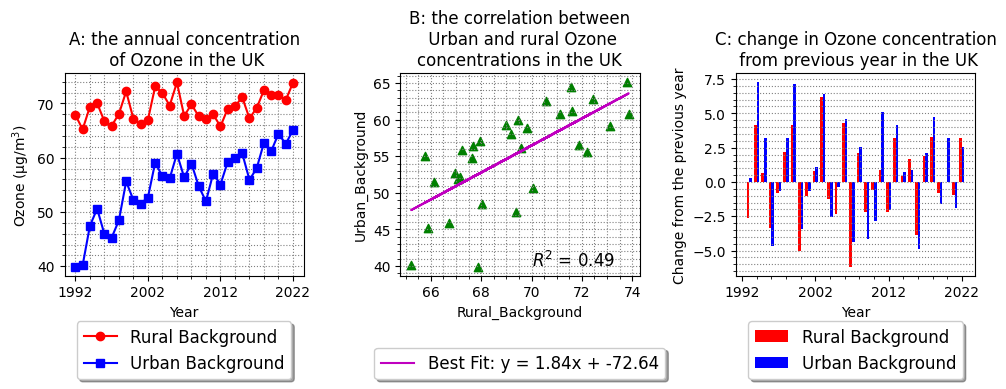

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
########################################
# plotting df_merged by year and Rural_Background/Urban_Background
for x in ['Rural_Background', 'Urban_Background']:
    
    ax[0].plot(df_merged_filtered['year'], df_merged_filtered[x], 
               marker = info[x]['marker'], c = info[x]['key_color'], label= info[x]['label'])
    
# set x ticks 
ax[0].set_xticks(np.arange(df_merged_filtered['year'].min(), df_merged_filtered['year'].max()+1, 10))

# add legend
legend = ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, -0.55), shadow=True, fontsize='large')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Ozone (µg/m$^3$)')
ax[0].set_title('A: the annual concentration\n of Ozone in the UK')
ax[0].grid(which = 'both', c = 'grey', ls = ':')
ax[0].minorticks_on()

########################################
# plot a scatter plot of df_merged_filtered by Urban_Background and Rural_Background
ax[1].scatter(df_merged_filtered['Rural_Background'], df_merged_filtered['Urban_Background'], marker = '^', c = 'g')

#add labels
ax[1].set_xlabel('Rural_Background')
ax[1].set_ylabel('Urban_Background')
ax[1].set_title('B: the correlation between\n Urban and rural Ozone\nconcentrations in the UK')
ax[1].grid(which = 'both', c = 'grey', ls = ':')
ax[1].minorticks_on()

# draw the best fit line

z = np.polyfit(df_merged_filtered['Rural_Background'], df_merged_filtered['Urban_Background'], 1)
p = np.poly1d(z)
ax[1].plot(df_merged_filtered['Rural_Background'],p(df_merged_filtered['Rural_Background']),
           "m-", label='Best Fit:'+f' y = {z[0]:.2f}x + {z[1]:.2f}')

# plot R^2 in scipy
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df_merged_filtered['Rural_Background'], df_merged_filtered['Urban_Background'])
print(r_value**2)
ax[1].text(70, 40, f'$R^2$ = {r_value**2:.2f}', fontsize=12)

# add legend
legend = ax[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.55), shadow=True, fontsize='large')
####################################
bar_width = 0.35
# plotting the change per year in rural and urban background concentration of Ozone
for z in ['Rural_Background', 'Urban_Background']:
    
    ax[2].bar(df_merged_filtered['year'] - bar_width/2, df_merged_filtered[z].diff(), 
              label = info[z]['label'], color = info[z]['key_color'], width = abs(bar_width))
    bar_width = - bar_width

# set x ticks 
ax[2].set_xticks(np.arange(df_merged_filtered['year'].min(), df_merged_filtered['year'].max()+1, 10))
    
# add legend
legend = ax[2].legend(loc='lower center', bbox_to_anchor=(0.5, -0.55), shadow=True, fontsize='large')

# add labels 
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Change from the previous year')
ax[2].set_title('C: change in Ozone concentration\n from previous year in the UK')
ax[2].grid(which = 'both', axis = 'y', c = 'grey', ls = ':')
ax[2].minorticks_on()
############################################
plt.tight_layout(h_pad=None, w_pad=None)
plt.show()

In [28]:
print(df_merged_filtered)

    index  year  Rural_Background  Urban_Background    ann
0       5  1992         67.864186         39.920732   8.69
1       6  1993         65.215029         40.177077   8.33
2       7  1994         69.383870         47.429640   8.89
3       8  1995         70.041854         50.599691   9.17
4       9  1996         66.705514         45.922460   8.18
5      10  1997         65.878042         45.256292   9.41
6      11  1998         68.051005         48.456825   9.16
7      12  1999         72.206833         55.613054   9.37
8      13  2000         67.168577         52.186089   9.10
9      14  2001         66.141094         51.536867   8.80
10     15  2002         66.954931         52.659081   9.44
11     16  2003         73.120972         59.103133   9.47
12     17  2004         71.905542         56.548156   9.44
13     18  2005         69.588804         56.163646   9.42
14     19  2006         73.861210         60.726035   9.70
15     20  2007         67.686823         56.361955   9.

The figure consists of three graphs showing different represeantations of the ozone concentration in the UK.

* Figure A shows the evolution of the annual concentration of Ozone in the UK between 1992 and 2020 with red representing rural background ozone levels and blue for urban background. Both datasets show an overall increasing trend in ozone concentration over time, with the rural levels being consistently higher.

* Figure B shows the correlation between Urban and rural Ozone concentrations in the UK. The plot correlates rural background ozone levels (x-axis) with urban background levels (y-axis). The best fit line of the linear regression model indicates a positive relationship with an R squared value of 0.49, suggesting a moderate correlation between rural and urban ozone levels.

* Figure C shows the change in Ozone concentration from previous year in the UK. The graph depicts no particular trand and flactuation over the years. Overall, there was a consistency in the fluctuation trend between the rural and urban Ozzone concentrations.  

#### STEP 4: assessing the correlation between rural and urban background concentration of Ozone and meteorological factors

The correlation was assessed using the merged dataframe by drawing a scatter plot where the x axis is one of the meteorological factors e.g, the average annunal temperature in celsius (°C) and the y axis is the average annual background concentration of Ozone (µg/m$^3$). Using the matplotlib.pyplot.scatter method, the parameters were passed as follows: x axis as the column 'ann' and the y axis as the column 'Rural_Background' and other parameters were also selected to improve the presentation, the viualisation and the readability of the scatter plot.

Assuming the correlarion is defined by a linear regression, the best fit line was drawn using polyfit from numpy which takes the x and y coordinates and the degree of the fitting polynomial which was selected as 1. The linear model has the equation of the form ($y = m\times x + c$). The numpy polyfit function returns an array of the values of the constants m and c. The poly1d function returns the equation using the values of the constants that were found in the numpy polyfit function. To plot the best fit line, the plot fucntion was used where x is the meteorological factor and y is the estimated background concentration of Ozone which is derived from the function of the equation (p).

The best fit line was also calculated using stats.linregress in which from the libraray scipy, the library stats was imported. The slope, intercept, r_value, p_value and std_err were calculated using stats.linregress. 

The confidence interval of the best fit line is calculated to assess the precision of the estimated relationship between the Average annual concentration of Ozone and the meteorological factors. It provides a range within which the true slope of the population regression line is expected to lie with a certain level of confidence. This interval accounts for the variability in the data and gives insight into the statistical significance and reliability of the estimated slope.

The confidence interval (CI) of a linear slope regression can be calculated using the following equation: 

\begin{align}
CI = m \pm t^{*} \times SE(m)
\end{align}

Where: 

m is the slope coefficient 

t* is the t critical value for confidence level

SE(m) is the standard error of m 

The 95% confidence interval area was drawn using regplot function from seaborn library. 

Rural Background best fit equation:   
4.473 x + 27.81
Urban Background best fit equation:   
8.745 x - 25.35


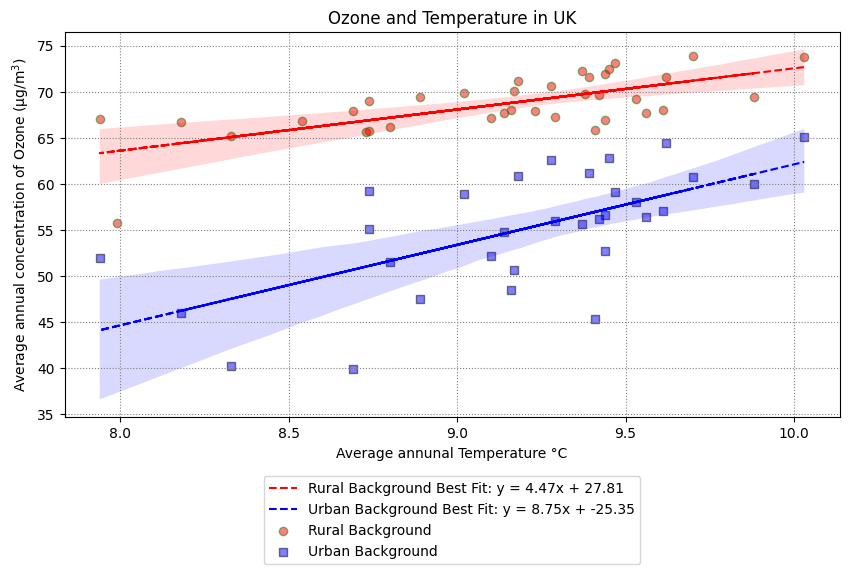

In [29]:
def assess_correlation_Ozone_and_meteorological_factor ():
    # create a figure to hold the plot
    fig , ax = plt.subplots(figsize=(10, 5))
    
    for x in info.keys():
        # remove NaN values
        df_filtered = df_merged[df_merged[x].notna()]
        ##########################################################################################
        # plot a scatter plot of df_merged by year and Rural_Background
        ax.scatter(df_filtered[df_filtered[x]!=np.nan]['ann'], df_filtered[x], 
                   c = info[x]['key_color'], 
                   edgecolors = info[x]['sec_color'], 
                   marker = info[x]['marker'], 
                   label = info[x]['label'], 
                   alpha = 0.5)
        
        ##########################################################################################
        # add best fit line for Rural_Background
        # The assumption of a linear fit, which follows the form: y = m+xc 
        # finding the constants
        z = np.polyfit(df_filtered['ann'], df_filtered[x], 1) 
        # writing the equation
        p = np.poly1d(z)  
        print (info[x]['label']+' best fit equation: ', p)
        # plot the line
        ax.plot(df_filtered['ann'],p(df_filtered['ann']),
                color = info[x]['key_color'],
                linestyle = info[x]['linestyle'],
                label = info[x]['label']+' Best Fit: ' + f'y = {z[0]:.2f}x + {z[1]:.2f}')

        #plot the equation of the line
        #print(z)
        #ax.text(10, 50, f'y = {z[0]:.2f}x + {z[1]:.2f}', fontsize=12)
        ##########################################################################################
        # plot 95% confidence interval for Rural_Background as an area
        import seaborn as sns
        ci = 95
        sns.regplot(ax = ax, # 
                    # y = x where x is from the for loop
                    x = 'ann', y = x, data = df_filtered, 
                    order = 1, # linear regression
                    fit_reg = True, ci = ci,
                    color = info[x]['key_color'],
                    scatter = False, # we can remove the scatter plot above if this is True
                    line_kws = {'linestyle':''}, # we can remove the best fit plot above if this is not ''
                   )

    ##########################################################################################
    # plot legends 
    ax.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.4))
    # create lables
    ax.set_xlabel('Average annunal Temperature °C')
    ax.set_ylabel('Average annual concentration of Ozone (µg/m$^3$)')
    ax.set_title('Ozone and Temperature in UK')
    ##NOTE: add R value to the plot
    # add grid dotted lines and light grey color
    ax.grid(c = 'grey', ls = ':')

    tight_layout = True
    plt.show()
    
assess_correlation_Ozone_and_meteorological_factor()

Ths above figure shows a scatter plot of the relationship between one of the meteorological factors whihc is the average annual temperature and the average annual concentration of ozone in micrograms per cubic meter (µg/m³) in the UK. 

The red circles represents the average annual concentration of ozone in rural areas of the UK plotted against the average annual temperature. The red line shows the best fit line of the form $y=4.47x+27.81$, where where 'y' is the average annual concentration of ozone and 'x' is the average annual temperature. It is a linear regression indicating the trend in the data. The confidence interval is shown as a shaded area around the line to represent the uncertainty around the best fit line.

The blue squares represents the average annual concentration of ozone in urban areas of the UK plotted against the average annual temperature. The blue line represents the best fit line of the form $y=8.75x+25.35$. 

A positive correlation between temperature and ozone concentration in both rural and urban areas. In other words, the temperature with the increase of the concentration of ozone. The steeper slope in the urban area reflects a stronger correlation compared to the rural areas, which indicates that the temperature might have a remarkable impact on the concentration of Ozone in in urban areas. The wider confidence interval of the concentration of Ozone in the rural areas suggests more uncertainty and variability in the trends and the measurements. 

### Objective 2: Atmospheric CO<sub>2</sub> Levels

In the next section we load a text file containing monthly atmospheric CO<sub>2</sub> measurements. It's a bit complicated because there is a large section commented out by "#"s at the beginning, so we need to read it in as text, strip these lines out, and then construct a PANDAS dataframe from the rest, converting it to float values as we go.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                788 non-null    float64
 1   Month               788 non-null    float64
 2   Decimal Date        788 non-null    float64
 3   CO2 ppm             788 non-null    float64
 4   CO2 deseasonalised  788 non-null    float64
 5   days                788 non-null    float64
 6   days_SD             788 non-null    float64
 7   uncertainty         788 non-null    float64
dtypes: float64(8)
memory usage: 49.4 KB


None

<AxesSubplot:>

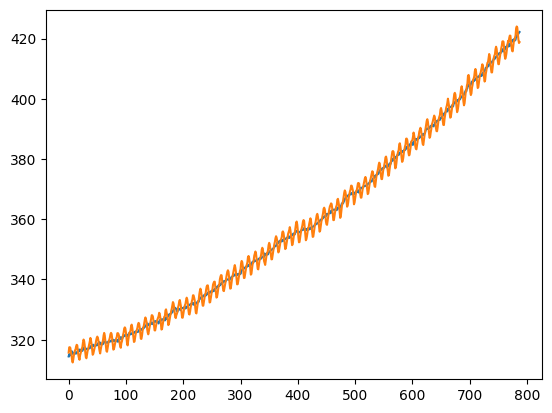

In [30]:
#This data is from the Mauna Loa observatory (apart from a few months when it was erupting, and Mauna Kea values were used)
co2_file = open("co2_mm_mlo.txt","r")
all_lines = co2_file.readlines()
data_lines = [line.split() for line in all_lines if line[0]!= '#']
col_names = ["Year","Month", "Decimal Date","CO2 ppm","CO2 deseasonalised","days","days_SD","uncertainty"]
co2_df = pd.DataFrame(data_lines,columns = col_names, dtype = "float64")
co2_file.close()
#print(data_lines)
display(co2_df.info())
co2_df["CO2 deseasonalised"].plot()
co2_df["CO2 ppm"].rolling(1).mean().plot()

,Year,CO2_PPM
0,1000,278.66
1,1001,278.68
2,1002,278.69
3,1003,278.71
4,1004,278.72


<AxesSubplot:xlabel='Year', ylabel='CO2_PPM'>

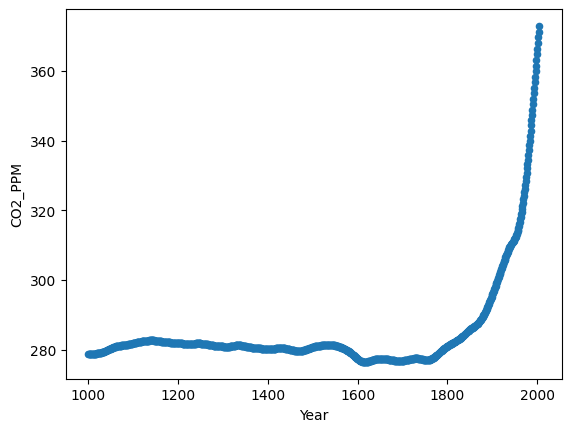

In [31]:
ice_core_co2 = pd.read_csv("smoothedco2_1000y.csv")
display(ice_core_co2.head())
ice_core_co2.plot.scatter("Year","CO2_PPM")

In [32]:
co2_df.set_index(co2_df["Year"])
co2_data = pd.concat([co2_df,ice_core_co2],axis=1)
co2_data

,Year,Month,Decimal Date,CO2 ppm,CO2 deseasonalised,days,days_SD,uncertainty,Year,CO2_PPM
0,1958.0,3.0,1958.2027,315.70,314.43,-1.0,-9.99,-0.99,1000,278.66
1,1958.0,4.0,1958.2877,317.45,315.16,-1.0,-9.99,-0.99,1001,278.68
2,1958.0,5.0,1958.3699,317.51,314.71,-1.0,-9.99,-0.99,1002,278.69
3,1958.0,6.0,1958.4548,317.24,315.14,-1.0,-9.99,-0.99,1003,278.71
4,1958.0,7.0,1958.5370,315.86,315.18,-1.0,-9.99,-0.99,1004,278.72
...,...,...,...,...,...,...,...,...,...,...
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,366.40
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,368.03
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002,369.66
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,371.30


#### Local Weather: Yorkshire and Humber

To look at weather intensity, and whether that has increased over the last 100 years or so, we need a more detailed dataset, in terms of both time resolution and locale. In this case, we've focussed on the local area, and obtained data (from the Met Office, but from the CEDA repository), for daily rainfall and maximum temperature. This will allow us to investigate whether rainfall intensity (length of rainfall periods, and amount of rainfall during them) has increased, and also whether the incidence of heatwaves has increased.

The data in this section comes from the CEDA archive (the data can be found here:
https://dap.ceda.ac.uk/badc/ukmo-hadobs/data/insitu/MOHC/HadOBS/HadUK-Grid/v1.2.0.ceda/region/), and is mostly in the form of .nc files: to get these into a PANDAS dataframe we have used xarray, which itself uses netCDF4.

It requires a (free) account to access it, so the files have been downloaded, and read from local disk.

It's a little complicated to filter, because it has a multi-level index, so we filter using .xs() to select the data we want (that corresponding to the region which in a given dataset is Yorkshire and Humber), and the 0th band (it looks like band 1 is identical).

#### Local Monthly Rainfall

To compare Yorkshire's mean temperature data with the data above for the UK at the monthly level, here is a monthly dataset

In [53]:
%pip install xarray
%pip install netCDF4
import xarray as xr
import netCDF4
import requests

temp_monthly_link = "https://github.com/omariosc/comp5712-p4ds-group-project/blob/main/tas_hadukgrid_uk_region_mon_188401-202112.nc?raw=true"

# The URL is adjusted to point directly to the raw file
r_temp_monthly_link = requests.get(temp_monthly_link)
with open('temp.nc', 'wb') as f:
    f.write(r_temp_monthly_link.content)


temp_monthly = xr.open_dataset("temp.nc")
#print(rainfall_daily)
df_temp_m = temp_monthly.to_dataframe()
#display(df_tmaxd.head(50))
df_yorks_temp = df_temp_m.xs(12, level = "region").xs(0,level = "bnds")
display(df_yorks_temp)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


,tas,time_bnds,geo_region,calendar_year,month_number,season_year
time,,,,,,
1884-01-16,4.864830,1884-01-01,b'Yorkshire and Humber ',1884,1,1884
1884-02-16,3.981511,1884-02-01,b'Yorkshire and Humber ',1884,2,1884
1884-03-16,4.986235,1884-03-01,b'Yorkshire and Humber ',1884,3,1884
1884-04-16,6.029561,1884-04-01,b'Yorkshire and Humber ',1884,4,1884
1884-05-16,9.795306,1884-05-01,b'Yorkshire and Humber ',1884,5,1884
...,...,...,...,...,...,...
2021-08-16,15.476466,2021-08-01,b'Yorkshire and Humber ',2021,8,2021
2021-09-16,15.320417,2021-09-01,b'Yorkshire and Humber ',2021,9,2021
2021-10-16,11.127126,2021-10-01,b'Yorkshire and Humber ',2021,10,2021


<AxesSubplot:xlabel='time'>

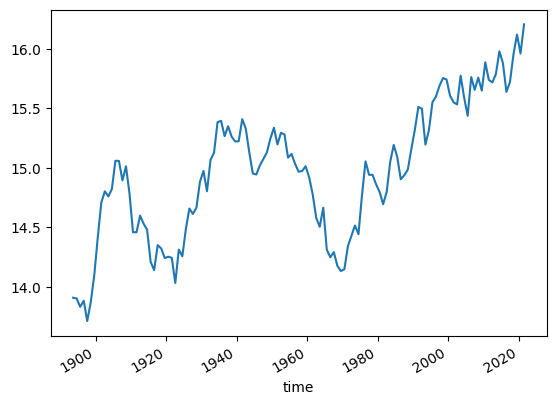

In [54]:
df_yorks_temp[df_yorks_temp["month_number"] == 7]["tas"].rolling(10).mean().plot()

It is clear from this graph that the rising trend seen nationally is also seen in Yorkshire, though there is a lot of variation in the first half of the century, even when using a 10-year rolling average.

#### Yorkshore Daily Rainfall Data

This dataset provides rainfall data at the daily level, by UK region. The data can be found here:
https://dap.ceda.ac.uk/badc/ukmo-hadobs/data/insitu/MOHC/HadOBS/HadUK-Grid/v1.2.0.ceda/region/rainfall/day/v20230328/rainfall_hadukgrid_uk_region_day_18910101-20221231.nc?download=1

We can use this data to look at the length of rainfall periods, and the amount of rain that falls during them.

In [35]:
rainfall_daily_link = "https://github.com/omariosc/comp5712-p4ds-group-project/blob/main/rainfall_hadukgrid_uk_region_day_18910101-20221231.nc?raw=true"

# The URL is adjusted to point directly to the raw file
r_rainfall_daily_link = requests.get(rainfall_daily_link)
with open('temps.nc', 'wb') as f:
    f.write(r_rainfall_daily_link.content)

# Now, read the NetCDF file using xarray
rainfall_daily = xr.open_dataset('temps.nc')

In [36]:
df_rfd = rainfall_daily.to_dataframe()
df_yorks = df_rfd.xs(16, level = "region").xs(0,level = "bnds") #["rainfall","geo_region"]

display(df_yorks.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48212 entries, 1891-01-01 12:00:00 to 2022-12-31 12:00:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rainfall    48212 non-null  float64       
 1   time_bnds   48212 non-null  datetime64[ns]
 2   geo_region  48212 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ MB


None

Now we want to see if we can label each row  with its year, month and day, so we can iterate over them

In [37]:
df_yorks["year"] = df_yorks["time_bnds"].dt.year
df_yorks["month"] = df_yorks["time_bnds"].dt.month
df_yorks["day"] = df_yorks["time_bnds"].dt.day
display(df_yorks.head())

,rainfall,time_bnds,geo_region,year,month,day
time,,,,,,
1891-01-01 12:00:00,0.00204,1891-01-01 09:00:00,b'Yorkshire and Humber',1891,1,1
1891-01-02 12:00:00,0.49175,1891-01-02 09:00:00,b'Yorkshire and Humber',1891,1,2
1891-01-03 12:00:00,2.01729,1891-01-03 09:00:00,b'Yorkshire and Humber',1891,1,3
1891-01-04 12:00:00,1.92267,1891-01-04 09:00:00,b'Yorkshire and Humber',1891,1,4
1891-01-05 12:00:00,1.08062,1891-01-05 09:00:00,b'Yorkshire and Humber',1891,1,5


#### Yorkshire Rainfall Intensity

Now we will calculate, for each year, the average number of days a rainy period lasts, and the average rainfall during it. For each spell, we'll calculate the rainfall during it, divided by the duration, to get an intensity measurement (i.e. average rainfall per day). We'll set a minimum rainfall of 1 mm for it to count as a rainy day (it IS Yorkshire, after all...)

In [38]:
min_rf = 1
list_of_years = []
for yr in range(1891,2023):
    rfl = []
    rfs = []
    rfi = []
    yr_frame = df_yorks[df_yorks["year"] == yr]["rainfall"]
    rf_length = 0
    rf_sum = 0
    for rf in yr_frame:
        if rf >= min_rf:
            rf_length += 1
            rf_sum += rf
        else:
            #This rainfall episode has ended: store data and reset accumulator variables
            if rf_length > 0:
                rfl.append(rf_length)
                rfs.append(rf_sum)
                rfi.append(rf_sum/rf_length)
            rf_length =0
            rf_sum =0
    list_of_years.append((yr,len(rfl),np.mean(rfl),np.sum(rfl),np.mean(rfs),np.sum(rfs),np.mean(rfi)))
            
        
#print(list_of_years)
col_names = ["Year", "No. rainy episodes","Mean duration","Total No days","Mean volume","Total volume","Mean daily rainfall"]
drf_df = pd.DataFrame(list_of_years,columns = col_names)
drf_df.set_index("Year",inplace=True)
display(drf_df)

,No. rainy episodes,Mean duration,Total No days,Mean volume,Total volume,Mean daily rainfall
Year,,,,,,
1891,51,3.352941,171,15.560026,793.56134,4.257260
1892,67,2.492537,167,11.789915,789.92431,4.258132
1893,60,2.433333,146,10.657731,639.46385,4.251232
1894,60,2.900000,174,13.346735,800.80407,4.211851
1895,55,2.963636,163,15.478474,851.31609,4.160557
...,...,...,...,...,...,...
2018,65,2.353846,153,11.368586,738.95806,4.224048
2019,55,3.181818,175,17.365961,955.12788,5.063941
2020,54,3.240741,175,17.217676,929.75449,4.471386


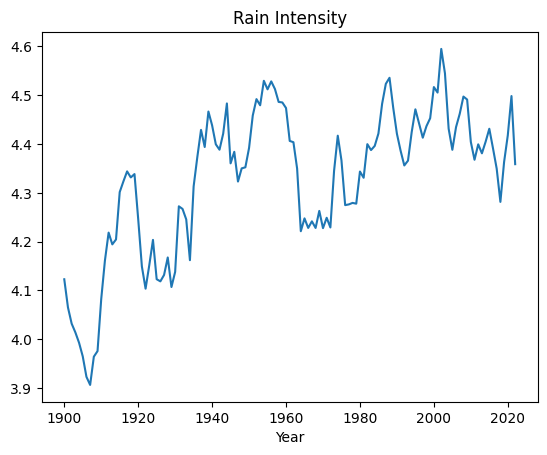

In [39]:
drf_df["Mean daily rainfall"].rolling(10).mean().plot(title = "Rain Intensity")
plt.show()

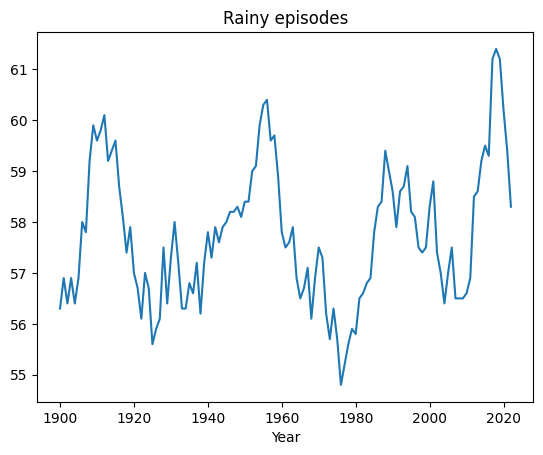

In [40]:
drf_df["No. rainy episodes"].rolling(10).mean().plot(title = "Rainy episodes")
plt.show()

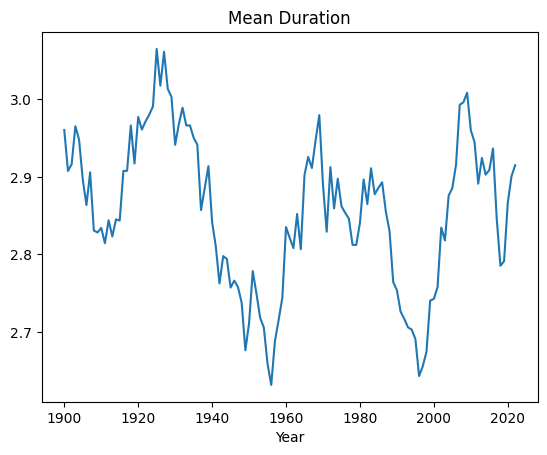

In [41]:
drf_df["Mean duration"].rolling(10).mean().plot(title = "Mean Duration")
plt.show()

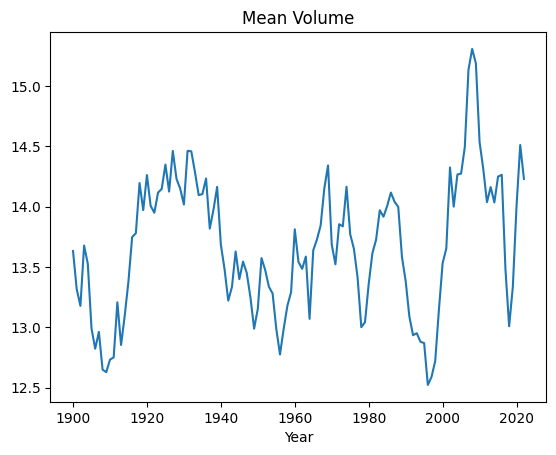

In [42]:
drf_df["Mean volume"].rolling(10).mean().plot(title = "Mean Volume")
plt.show()

In [43]:
drf_df.describe()

,No. rainy episodes,Mean duration,Total No days,Mean volume,Total volume,Mean daily rainfall
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,57.704545,2.860699,164.363636,13.697312,787.233609,4.325328
std,4.812101,0.298150,15.481224,1.982964,109.823781,0.378006
min,45.000000,2.180328,124.000000,9.844955,545.542430,3.494542
25%,54.000000,2.669165,154.750000,12.449210,714.409627,4.091107
50%,58.000000,2.859563,165.500000,13.361918,789.911000,4.257696
75%,61.000000,3.034615,175.250000,14.973338,868.312267,4.525436
max,68.000000,3.744681,198.000000,19.788665,1074.675060,5.587432


It seems that there is a clear trend towards more intense rainfall, but no obvious increase in the number or duration of the episodes. This is consistent with the hypothesis that weather events will become more intense (but not necessarily more frequent) as a consequence of global warming.

#### Heatwaves

The Met Office defines a heat wave as three or more days when the maximum daily temperature exceeds the local threshold (https://www.metoffice.gov.uk/weather/learn-about/weather/types-of-weather/temperature/heatwave).

For Yorkshire and Humber, this threshold is 25 or 26 degrees Celsius, depending on which bit you are in! We'll take 26.

Here is some data on the maximum temperature each day for UK regions, downloaded from this source:
https://dap.ceda.ac.uk/badc/ukmo-hadobs/data/insitu/MOHC/HadOBS/HadUK-Grid/v1.2.0.ceda/region/tasmax/day/v20230328/tasmax_hadukgrid_uk_region_day_19600101-20221231.nc

We then extract the data for Yorkshire and Humber.

Note that this data is only available from 1960!

In [44]:
temp_max_daily_link = "https://github.com/omariosc/comp5712-p4ds-group-project/blob/main/tas_hadukgrid_uk_region_mon_188401-202112.nc?raw=true"

# The URL is adjusted to point directly to the raw file
r_temp_max_daily_link = requests.get(temp_max_daily_link)
with open('tempsss.nc', 'wb') as f:
    f.write(r_temp_max_daily_link.content)

temp_max_daily = xr.open_dataset('tempsss.nc')

In [45]:
df_tmax = temp_max_daily.to_dataframe()
df_yorks_temp_max = df_tmax.xs(12, level = "region").xs(0,level = "bnds")
df_yorks_temp_max["Year"] = df_yorks["time_bnds"].dt.year
df_yorks_temp_max["Month"] = df_yorks["time_bnds"].dt.month
df_yorks_temp_max["Day"] = df_yorks["time_bnds"].dt.day
df_yorks_temp_max.rename(columns = {"tas":"Max Temp"}, inplace = True) # renamed because of different dataset
display(df_yorks_temp_max)

,Max Temp,time_bnds,geo_region,calendar_year,month_number,season_year,Year,Month,Day
time,,,,,,,,,
1884-01-16,4.864830,1884-01-01,b'Yorkshire and Humber ',1884,1,1884,NaN,NaN,NaN
1884-02-16,3.981511,1884-02-01,b'Yorkshire and Humber ',1884,2,1884,NaN,NaN,NaN
1884-03-16,4.986235,1884-03-01,b'Yorkshire and Humber ',1884,3,1884,NaN,NaN,NaN
1884-04-16,6.029561,1884-04-01,b'Yorkshire and Humber ',1884,4,1884,NaN,NaN,NaN
1884-05-16,9.795306,1884-05-01,b'Yorkshire and Humber ',1884,5,1884,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-08-16,15.476466,2021-08-01,b'Yorkshire and Humber ',2021,8,2021,NaN,NaN,NaN
2021-09-16,15.320417,2021-09-01,b'Yorkshire and Humber ',2021,9,2021,NaN,NaN,NaN
2021-10-16,11.127126,2021-10-01,b'Yorkshire and Humber ',2021,10,2021,NaN,NaN,NaN


In [46]:
df_yorks_temp_max.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1656 entries, 1884-01-16 to 2021-12-16
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Max Temp       1656 non-null   float64       
 1   time_bnds      1656 non-null   datetime64[ns]
 2   geo_region     1656 non-null   object        
 3   calendar_year  1656 non-null   int64         
 4   month_number   1656 non-null   int64         
 5   season_year    1656 non-null   int64         
 6   Year           0 non-null      float64       
 7   Month          0 non-null      float64       
 8   Day            0 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 129.4+ KB


Now we'll search each year for heatwaves.

In [47]:
def FindHeatWaves(thresh):
    list_of_years = []
    for yr in range(1960,2021):
        templ = []
        yr_frame = df_yorks_temp_max[df_yorks_temp_max["Year"] == yr]["Max Temp"]
        hw_length = 0
        for tmax in yr_frame:
            if tmax >= thresh:
                hw_length += 1
            else:
                #This hot episode has ended: store data and reset accumulator variables
                if hw_length > 2:
                    templ.append(hw_length)
                hw_length =0
        list_of_years.append((yr,len(templ),np.mean(templ)))

    col_names = ["Year", "No. of heatwaves","Mean duration"]
    dt_df = pd.DataFrame(list_of_years,columns = col_names)
    dt_df.set_index("Year",inplace=True)
    return dt_df

#thresh = 20
#list_of_years = []
#for yr in range(1960,2021):
#    templ = []
#    yr_frame = df_yorks_temp_max[df_yorks_temp_max["year"] == yr]["tasmax"]
#    hw_length = 0
#    for tmax in yr_frame:
#        if tmax >= thresh:
#            hw_length += 1
#        else:
#            #This hot episode has ended: store data and reset accumulator variables
#            if hw_length > 2:
#                templ.append(hw_length)
#            hw_length =0
#    list_of_years.append((yr,len(templ),np.mean(templ)))
            
#col_names = ["Year", "No. of heatwaves","Mean duration"]
#dt_df = pd.DataFrame(list_of_years,columns = col_names)
#dt_df.set_index("Year",inplace=True)

heatwaves26 = FindHeatWaves(26)
display(heatwaves26)  

c:\Users\omarc\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\omarc\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,No. of heatwaves,Mean duration
Year,,
1960,0,NaN
1961,0,NaN
1962,0,NaN
1963,0,NaN
1964,0,NaN
...,...,...
2016,0,NaN
2017,0,NaN
2018,0,NaN


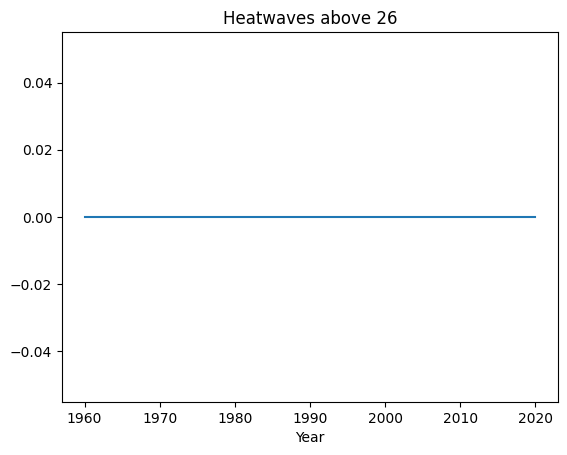

In [48]:
heatwaves26["No. of heatwaves"].plot(title = "Heatwaves above 26")
plt.show()

Taking the Met Office's current threshold, we see that there are relatively few heatwaves, though there is a suggestion that they are becoming more frequent (4 during the first 30 years of data, and 11 in the next 30 years).

To investigate this further, we looked at the frequencies if we set the threshold a bit lower - at 20 degrees.

In [49]:
heatwaves20 = FindHeatWaves(20)
display(heatwaves20)  

c:\Users\omarc\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\omarc\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,No. of heatwaves,Mean duration
Year,,
1960,0,NaN
1961,0,NaN
1962,0,NaN
1963,0,NaN
1964,0,NaN
...,...,...
2016,0,NaN
2017,0,NaN
2018,0,NaN


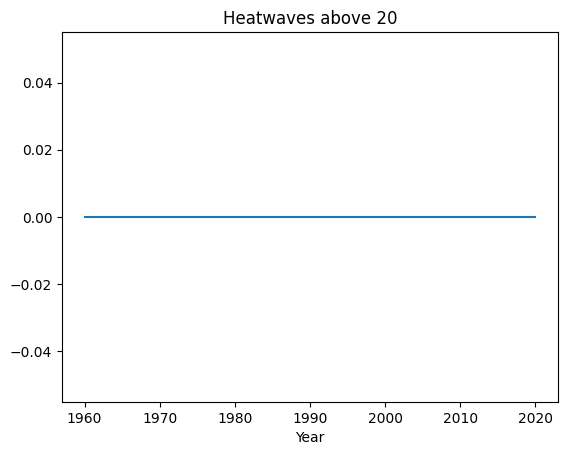

In [50]:
heatwaves20["No. of heatwaves"].plot(title = "Heatwaves above 20")
plt.show()

<AxesSubplot:title={'center':'Duration of Heatwaves above 20'}, xlabel='Year'>

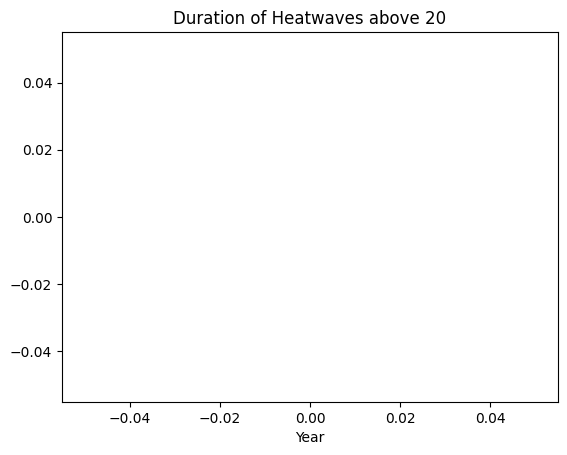

In [51]:
heatwaves20["Mean duration"].plot(title = "Duration of Heatwaves above 20")

Now there is a clear trend towards more episodes of relatively high temperatures, though there is no obvious increase in their duration.

# Project Outcome (10 + 10 marks)

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram_

_The section should begin with a general overview of the results and then have a section for each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where
the project had just one objective, you should still have a section describing
the results from a general perspective followed by a section that focuses on
the particular objective.)_

_The marks for this section will be divided into 10 marks for Explanation
and 10 marks for Visualisation. These marks will be awarded for the Project Outcome
section as a whole, not for each objective individually. Hence, you do not
have to pay equal attention to each. However, you are expected to have a
some explanation and visualisation for each. It is suggested you have
200-400 words explanation for each objective._

## Overview of Results
_Give a general overview of the results (around 200 words)._

## Objective 1

### Explanation of Results

_200-400 words_

### Visualisation
_The following bar chart gives a vivid representation of the distribution
of fridge magnet types, in which the dominance of 'meme' type magnets
is dramatically illustrated._

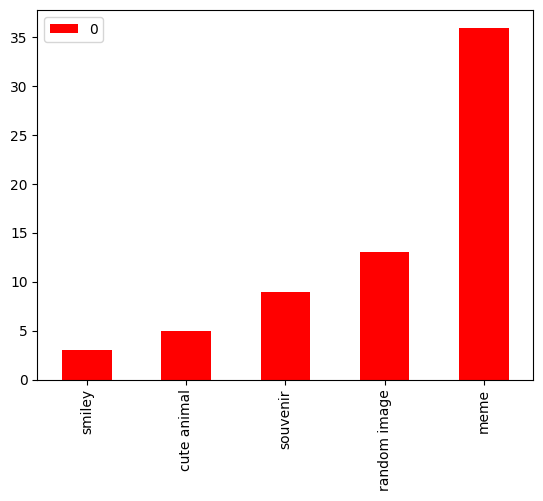

In [52]:
fridge_sorted_bar(color='red')

## Objective 2
### Explanation of Results

200-400 Words

### Visualisation

## Objective 3
### Explanation of Results

200-400 Words

### Visualisation

## Objective 4 
### Explanation of Results

200-400 Words

### Visualisation

# Conclusion (5 marks)

_Your concluding section should be around 200-400 words. It is recommended
that you divide it into the following sections._

### Achievements
_As we had expected, the most popular fridge magnets were of the 'meme' kind.
We were surprised that 'smiley' fridge magnets were less common than expected.
We conjecture that this is because, although they are apparently very popular,
few fridges display more than one smiley. However, 'meme' based magnets can
be found in large numbers, even on quite small fridges._

### Limitations

_The project was limited to a small number of fridge magents, which may not be
typical of fridges found in the global fridge magnet ecosystem._

### Future Work

_In future work we would like to obtain more diverse data and study fridge magnets 
beyond the limited confines of student accomodation. We hypothesise that there
could be a link between fridge magnet types and social class and/or educational
achievement._